In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
dataIris = load_iris()
dir(dataIris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

## 1. Preparing Dataset

In [3]:
df = pd.DataFrame(
    dataIris['data'],
#     columns = dataIris['feature_names']
    columns = ['SL', 'SW', 'PL', 'PW']
)

df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(
    lambda x: dataIris['target_names'][x])

df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


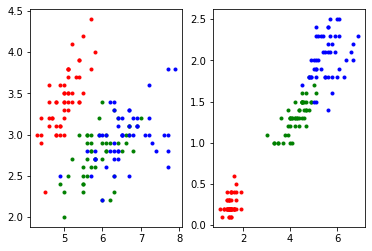

In [17]:
plt.figure()
plt.subplot(121)
plt.plot(df['SL'][df['target'] == 0], df['SW'][df['target'] == 0], 'r.')
plt.plot(df['SL'][df['target'] == 1], df['SW'][df['target'] == 1], 'g.')
plt.plot(df['SL'][df['target'] == 2], df['SW'][df['target'] == 2], 'b.')
plt.subplot(122)
plt.plot(df['PL'][df['target'] == 0], df['PW'][df['target'] == 0], 'r.')
plt.plot(df['PL'][df['target'] == 1], df['PW'][df['target'] == 1], 'g.')
plt.plot(df['PL'][df['target'] == 2], df['PW'][df['target'] == 2], 'b.')

## 2. Splitting Dataset

In [4]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(df[['SL', 'SW', 'PL', 'PW']], df['target'])

## 3. Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
modelA = LogisticRegression(solver='lbfgs', multi_class='auto')
modelB = LogisticRegression(solver='liblinear', multi_class='auto')

In [6]:
modelA.fit(xtr, ytr)
modelB.fit(xtr, ytr)

C:\Users\ROCHIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 4. ROC AUC

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [8]:
fpra0, tpra0, thrsa0 = roc_curve(
    yts, modelA.predict_proba(xts)[:, 0], pos_label=2)

fprb0, tprb0, thrsb0 = roc_curve(
    yts, modelB.predict_proba(xts)[:, 0], pos_label=2)

In [9]:
fpra1, tpra1, thrsa1 = roc_curve(
    yts, modelA.predict_proba(xts)[:, 1], pos_label=2)

fprb1, tprb1, thrsb1 = roc_curve(
    yts, modelB.predict_proba(xts)[:, 1], pos_label=2)

In [10]:
fpra2, tpra2, thrsa2 = roc_curve(
    yts, modelA.predict_proba(xts)[:, 2], pos_label=2)

fprb2, tprb2, thrsb2 = roc_curve(
    yts, modelB.predict_proba(xts)[:, 2], pos_label=2)

In [11]:
# ROC Score

aucA0 = auc(fpra0, tpra0)
aucB0 = auc(fprb0, tprb0)

aucA1 = auc(fpra1, tpra1)
aucB1 = auc(fprb1, tprb1)

aucA2 = auc(fpra2, tpra2)
aucB2 = auc(fprb2, tprb2)

aucA0, aucB0, aucA1, aucB1, aucA2, aucB2

(0.01136363636363636,
 0.0028409090909090884,
 0.32954545454545453,
 0.41761363636363635,
 1.0,
 0.9943181818181819)

In [12]:
auA = roc_auc_score(
    np.array(yts.tolist()),
    modelA.predict_proba(xts), labels=[0,1,2], multi_class='ovo', 
    average='macro')

auB = roc_auc_score(
    np.array(yts.tolist()),
    modelB.predict_proba(xts), labels=[0,1,2], multi_class='ovo', 
    average='macro')

auA, auB

TypeError: roc_auc_score() got an unexpected keyword argument 'labels'

Text(0, 0.5, 'True Positif Rate')

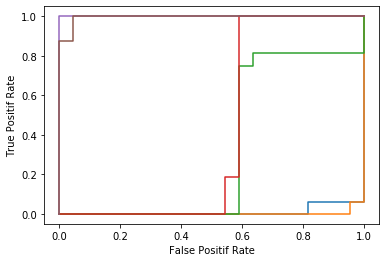

In [13]:
plt.plot(fpra0, tpra0)
plt.plot(fprb0, tprb0)

plt.plot(fpra1, tpra1)
plt.plot(fprb1, tprb1)

plt.plot(fpra2, tpra2)
plt.plot(fprb2, tprb2)

plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')